In [ ]:
#Step 1: Understand the Data
Look at your dataset and identify columns.
Identify target variable (what you want to predict) → price.
Identify features (variables that may influence price) → e.g., bedrooms, bathrooms, sqft_living, floors, yr_built, etc.

Step 2: Clean the Data
Check for missing values or errors and decide how to handle them (remove rows, fill with average, etc.).
Ensure all selected features are in numerical format.
Convert dates or categorical variables to numbers if needed.

Step 3: Select Features
Choose features that are likely to impact the house price.
Exclude irrelevant information like street, statezip, or country (unless you plan to encode them).

Step 4: Split Data
Divide the dataset into training data (to train the model) and testing data (to evaluate performance).
Usually, 70–80% for training and 20–30% for testing.

Step 5: Train Linear Regression Model
Fit a linear regression model using the training data.
The model finds the relationship between features and the price.

Step 6: Make Predictions
Use the trained model to predict prices on the testing data.
This helps you see how well the model generalizes to new data.

Step 7: Evaluate the Model
Check how accurate the predictions are:
Mean Squared Error (MSE) → average error size
R² score → how much variance in price is explained by your model
Higher R² and lower MSE indicate a better model.

Step 8: Interpret Results
Look at the coefficients for each feature.
Positive → increases price
Negative → decreases price
#This tells you which features matter most in determining house price.

In [104]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("shree1992/housedata")

print("Path to dataset files:", path)
file_path = os.path.join(path,'data.csv')
df = pd.read_csv(file_path) 
df

Path to dataset files: C:\Users\USER PC\.cache\kagglehub\datasets\shree1992\housedata\versions\2


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [105]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [106]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [107]:
df.shape

(4600, 18)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [109]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [110]:
#Convert price to thousands
df["price"] = df["price"] / 1000

In [111]:
#convert datetype
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [112]:

# . REMOVE OUTLIERS (IQR METHOD)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['price'] < (Q1 - 1.5 * IQR)) & (df['price'] > (Q3 + 1.5 * IQR))
print("Data size after outlier removal:", df.shape)


Data size after outlier removal: (4600, 18)


In [113]:
# 2. FEATURE SELECTION
# =========================================================
y = df["price"]

X = df.drop(columns=["price", "date", "street"])

numeric_features = [
    "bedrooms","bathrooms","sqft_living","sqft_lot","floors",
    "waterfront","view","condition",
    "sqft_above","sqft_basement",
    "yr_built","yr_renovated"
]

categorical_features = ["city", "statezip", "country"]

# 4. PREPROCESSING
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 5. PIPELINE
# =========================================================
model = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("reg", LinearRegression())
    ]
)


# 6. TRAIN / TEST SPLIT
# =========================================================
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.20, random_state=42)


# 7. TRAIN
# =========================================================
model.fit(X_train, y_train)


# =========================================================
# 8. EVALUATE
# =========================================================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nMODEL PERFORMANCE")
print("--------------------")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2), "($ thousands)")



# 9. COEFFICIENTS
# =========================================================
num_features = numeric_features

cat_features = model.named_steps["prep"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(categorical_features)

feature_names = list(num_features) + list(cat_features)

coefficients = model.named_steps["reg"].coef_

coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

coef_table["Abs_Effect"] = coef_table["Coefficient"].abs()
coef_table = coef_table.sort_values("Abs_Effect", ascending=False)

print("\nTOP COEFFICIENTS")
print("-----------------")
print(coef_table[["Feature", "Coefficient"]].head(20))
# =========================================================




# 10. SAMPLE PREDICTIONS
# =========================================================
comparison = pd.DataFrame({
    "Actual_Price_(Thousands)": y_test.values,
    "Predicted_Price_(Thousands)": y_pred
})

print("\nSAMPLE PREDICTIONS")
print("--------------------")
print(comparison.head(10))



MODEL PERFORMANCE
--------------------
R² Score: 0.055
RMSE: 981.71 ($ thousands)

TOP COEFFICIENTS
-----------------
                Feature  Coefficient
33          city_Medina   502.292900
79    statezip_WA 98039   502.292900
58    statezip_WA 98004   495.659740
108   statezip_WA 98112   388.294326
113   statezip_WA 98119   333.016712
107   statezip_WA 98109   318.440736
128   statezip_WA 98198  -290.886704
103   statezip_WA 98105   279.437371
127   statezip_WA 98188  -248.538007
126   statezip_WA 98178  -246.567652
101   statezip_WA 98102   214.241419
123   statezip_WA 98166  -176.526751
26     city_Federal Way  -175.335184
72    statezip_WA 98029   172.190485
80    statezip_WA 98040   171.787131
34   city_Mercer Island   171.787131
15        city_Bellevue   158.587229
129   statezip_WA 98199   158.564728
121   statezip_WA 98148  -153.186997
124   statezip_WA 98168  -151.633799

SAMPLE PREDICTIONS
--------------------
   Actual_Price_(Thousands)  Predicted_Price_(Thousands)
0     

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

#Convert price to thousands
df["price"] = df["price"] / 1000
# . REMOVE OUTLIERS (IQR METHOD)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['price'] < (Q1 - 1.5 * IQR)) & (df['price'] > (Q3 + 1.5 * IQR))
print("Data size after outlier removal:", df.shape)

# 2. FEATURE SELECTION
# =========================================================
y = df["price"]

X = df.drop(columns=["price", "date", "street"])

numeric_features = [
    "bedrooms","bathrooms","sqft_living","sqft_lot","floors",
    "waterfront","view","condition",
    "sqft_above","sqft_basement",
    "yr_built","yr_renovated"
]

categorical_features = ["city", "statezip", "country"]
#=========================================================
# 3. FEATURE ENGINEERING
# =========================================================
# Remove zero or negative prices
df = df[df["price"] > 0]

# Property age
df["age"] = 2025 - df["yr_built"]

# Time since renovation (0 if never renovated)
df["renovated_age"] = np.where(df["yr_renovated"] > 0, 2025 - df["yr_renovated"], 0)

# Avoid division by zero
df["sqft_per_bedroom"] = np.where(df["bedrooms"] > 0, df["sqft_living"] / df["bedrooms"], 0)
df["sqft_per_bathroom"] = np.where(df["bathrooms"] > 0, df["sqft_living"] / df["bathrooms"], 0)


# Interaction terms
df["bed_bath_interaction"] = df["bedrooms"] * df["bathrooms"]
df["living_floors_interaction"] = df["sqft_living"] * df["floors"]

# =========================================================
# 4. TARGET & FEATURES
# =========================================================
y = np.log(df["price"])  # log-transform

X = df.drop(columns=["price", "date", "street", "sqft_above", "sqft_basement"])

# Numeric features including engineered ones
numeric_features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition",
    "age", "renovated_age",
    "sqft_per_bedroom", "sqft_per_bathroom",
    "bed_bath_interaction", "living_floors_interaction"
]

categorical_features = ["city", "statezip", "country"]

# 4. PREPROCESSING
# =========================================================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 5. PIPELINE
# =========================================================
model = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("reg", LinearRegression())
    ]
)


# 6. TRAIN / TEST SPLIT
# =========================================================
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.20, random_state=42)

# 7. TRAIN
# =========================================================
model.fit(X_train, y_train)


# =========================================================
# 8. EVALUATE
# =========================================================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nMODEL PERFORMANCE")
print("--------------------")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2), "($ thousands)")



# 9. COEFFICIENTS
# =========================================================
num_features = numeric_features

cat_features = model.named_steps["prep"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(categorical_features)

feature_names = list(num_features) + list(cat_features)

coefficients = model.named_steps["reg"].coef_

coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

coef_table["Abs_Effect"] = coef_table["Coefficient"].abs()
coef_table = coef_table.sort_values("Abs_Effect", ascending=False)

print("\nTOP COEFFICIENTS")
print("-----------------")
print(coef_table[["Feature", "Coefficient"]].head(20))
# =========================================================


# 10. SAMPLE PREDICTIONS
# =========================================================
comparison = pd.DataFrame({
    "Actual_Price_(Thousands)": y_test.values,
    "Predicted_Price_(Thousands)": y_pred
})

print("\nSAMPLE PREDICTIONS")
print("--------------------")
print(comparison.head(10))


Data size after outlier removal: (4600, 18)

MODEL PERFORMANCE
--------------------
R² Score: 0.7531
RMSE: 0.27 ($ thousands)

TOP COEFFICIENTS
-----------------
                Feature  Coefficient
129   statezip_WA 98198    -0.595514
59    statezip_WA 98004     0.542395
55    city_Yarrow Point     0.535104
109   statezip_WA 98112     0.525193
127   statezip_WA 98178    -0.519789
108   statezip_WA 98109     0.509769
114   statezip_WA 98119     0.502501
125   statezip_WA 98168    -0.466058
104   statezip_WA 98105     0.444928
128   statezip_WA 98188    -0.427336
22       city_Covington    -0.416098
130   statezip_WA 98199     0.366781
80    statezip_WA 98039     0.366772
34          city_Medina     0.366772
102   statezip_WA 98102     0.364278
122   statezip_WA 98148    -0.347032
14          city_Algona    -0.326715
38   city_Normandy Park     0.317884
15          city_Auburn    -0.303119
105   statezip_WA 98106    -0.291524

SAMPLE PREDICTIONS
--------------------
   Actual_Price_(Tho

C:\Users\USER PC\AppData\Local\Temp\ipykernel_1140\1769226721.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = 2025 - df["yr_built"]
C:\Users\USER PC\AppData\Local\Temp\ipykernel_1140\1769226721.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["renovated_age"] = np.where(df["yr_renovated"] > 0, 2025 - df["yr_renovated"], 0)
C:\Users\USER PC\AppData\Local\Temp\ipykernel_1140\1769226721.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [115]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,age,renovated_age,sqft_per_bedroom,sqft_per_bathroom,bed_bath_interaction,living_floors_interaction
0,2014-05-02,0.313000,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,70,20,446.666667,893.333333,4.50,2010.0
1,2014-05-02,2.384000,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,104,0,730.000000,1460.000000,12.50,7300.0
2,2014-05-02,0.342000,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,59,0,643.333333,965.000000,6.00,1930.0
3,2014-05-02,0.420000,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,62,0,666.666667,888.888889,6.75,2000.0
4,2014-05-02,0.550000,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,49,33,485.000000,776.000000,10.00,1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,0.308167,3.0,1.75,1510,6360,1.0,0,0,4,...,501 N 143rd St,Seattle,WA 98133,USA,71,46,503.333333,862.857143,5.25,1510.0
4596,2014-07-09,0.534333,3.0,2.50,1460,7573,2.0,0,0,3,...,14855 SE 10th Pl,Bellevue,WA 98007,USA,42,16,486.666667,584.000000,7.50,2920.0
4597,2014-07-09,0.416904,3.0,2.50,3010,7014,2.0,0,0,3,...,759 Ilwaco Pl NE,Renton,WA 98059,USA,16,0,1003.333333,1204.000000,7.50,6020.0
4598,2014-07-10,0.203400,4.0,2.00,2090,6630,1.0,0,0,3,...,5148 S Creston St,Seattle,WA 98178,USA,51,0,522.500000,1045.000000,8.00,2090.0


In [116]:

# Binary classification: expensive vs cheap
median_price = df["price"].median()
df["price_class"] = np.where(df["price"] > median_price, 1, 0)

y = df["price_class"]   # categorical target
X = df.drop(columns=["price", "price_class", "date", "street"], errors="ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


# Lasso (L1)
lasso_model = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000))
])


# Ridge (L2)
ridge_model = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(penalty="l2", solver="lbfgs", max_iter=1000))
])


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train Lasso
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Train Ridge
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


print("LASSO Classification")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))

print("\nRIDGE Classification")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))



C:\Users\USER PC\AppData\Local\Temp\ipykernel_1140\4049907643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_class"] = np.where(df["price"] > median_price, 1, 0)


LASSO Classification
Accuracy: 0.8869374313940724
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       448
           1       0.90      0.88      0.89       463

    accuracy                           0.89       911
   macro avg       0.89      0.89      0.89       911
weighted avg       0.89      0.89      0.89       911


RIDGE Classification
Accuracy: 0.8792535675082327
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       448
           1       0.89      0.87      0.88       463

    accuracy                           0.88       911
   macro avg       0.88      0.88      0.88       911
weighted avg       0.88      0.88      0.88       911



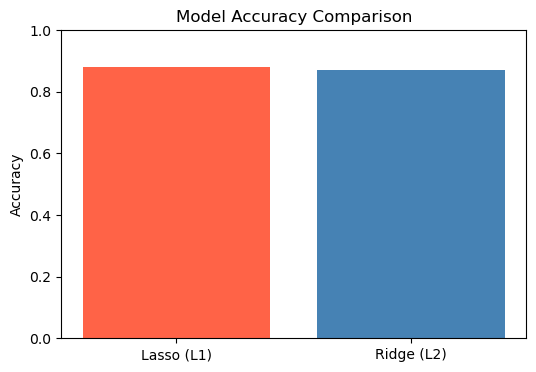

In [118]:
import matplotlib.pyplot as plt

# Suppose you already have accuracy scores
acc_lasso = 0.88
acc_ridge = 0.87

models = ["Lasso (L1)", "Ridge (L2)"]
scores = [acc_lasso, acc_ridge]

plt.figure(figsize=(6,4))
plt.bar(models, scores, color=["tomato","steelblue"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()